<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/articulos/200_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal para Data Science

## Contenido

### **1. Introducción**
- Importancia de la regresión lineal en Data Science
- ¿Qué problema resuelve el método de mínimos cuadrados?
- Ejemplo práctico: precios de viviendas

### **2. Planteamiento Matemático**
- Formulación del problema de minimización
- Derivación de la solución analítica
- Notación matricial y ecuaciones normales

### **3. Implementación con Mínimos Cuadrados**
- Código desde cero con NumPy
- Aplicación al dataset de viviendas
- Visualización de resultados

### **4. Introducción al Descenso del Gradiente**
- Limitaciones de mínimos cuadrados (datos grandes)
- Concepto intuitivo del algoritmo
- La función de coste y su gradiente

### **5. Implementación del Descenso del Gradiente**
- Algoritmo iterativo paso a paso
- Comparación de resultados con mínimos cuadrados
- Ventajas computacionales

### **6. Comparación de ambos métodos**
- ¿Por qué mínimos cuadrados funciona aquí? (convexidad)
- Cuándo falla mínimos cuadrados y gana descenso del gradiente
- Relevancia en Machine Learning moderno

### **7. Conclusión**
- Elección del método según el problema
- Regresión lineal como base para entender optimización
- Próximos pasos en ML

# **1. Introducción**

En Machine Learning, se aconseja comenzar programando un algoritmo de regresión lineal, ya que además de formativo se continúa usando a nivel empresarial en Data Science. Pero ¿por qué sigue siendo tan relevante en la era de los chat bots y las redes neuronales?

La respuesta es simple: **efectividad y interpretabilidad**. Mientras que modelos más complejos pueden actuar como "cajas negras", la regresión lineal nos permite entender exactamente cómo cada variable afecta a nuestro resultado. Es nuestro punto de partida natural para cualquier problema de predicción numérica.

## ¿Qué problema resuelve realmente?

Imagina que tienes datos históricos de precios de viviendas y quieres predecir cuánto costará una nueva casa. Tienes variables como metros cuadrados, número de habitaciones, ubicación... La regresión lineal te permite encontrar una relación matemática entre estas características y el precio.

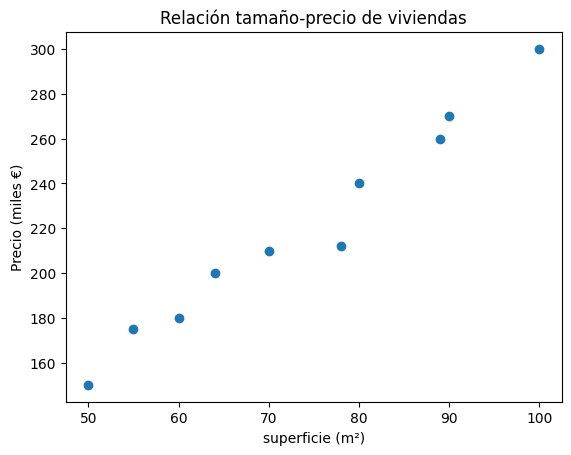

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: tamaño de casa vs precio
superficie = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
precio = np.array([150000, 175000, 180000, 200000, 210000, 212000 ,240000, 260000 ,270000, 300000])

plt.scatter(superficie, precio/1000)
plt.xlabel('superficie (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Relación tamaño-precio de viviendas')
plt.show()

El **método de mínimos cuadrados** (Ordinary Least Squares, OLS) resuelve un problema aparentemente sencillo: dada una nube de puntos, queremos encontrar la recta (o hiperplano) que mejor se ajuste a los datos. "Mejor" aquí significa minimizar la suma de los errores cuadráticos entre las predicciones y los valores reales.

# **2. Planteamiento general del problema de Regresión**

Ahora que entendemos por qué la regresión lineal es tan útil, vamos a formalizar matemáticamente el problema. Comenzaremos con el caso más simple una sola variable ($x$) para construir la intuición antes de generalizar al caso multivariable.

## Caso simple: una variable independiente

Empecemos con lo básico. Cuando tenemos solo una variable predictora $x$, queremos encontrar la recta que mejor se ajuste a nuestros datos:

$$
\begin{array}{lcl}
y = w_0 + w_1 x + e         & \longrightarrow & \text{modelo real con error} \\
\hat{y} = w_0 + w_1 x       & \longrightarrow & \text{modelo estimado}
\end{array}
$$


Donde:
- $\hat{y}$ es el **valor predicho** por el modelo (nuestra mejor estimación de $y$)
- $w_0$ es el **intercepto** (término independiente o bias)
- $w_1$ es la **pendiente** (coeficiente de la variable)
- $e$ es el **error o residuo**: la diferencia entre el valor real y lo que predice el modelo

El error de cada predicción es:

$$e_i = y_i - \hat{y}_i = y_i - (w_0 + w_1 x_i)$$

Nuestro objetivo es encontrar $w_0$ y $w_1$ que minimicen estos errores.

## El método de Mínimos Cuadrados

En lugar de usar los errores directamente (que se cancelarían entre positivos y negativos), trabajamos con los **errores al cuadrado**. Definimos la función de coste:

$$J(w_0, w_1) = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} [y_i - (w_0 + w_1 x_i)]^2$$

El método de mínimos cuadrados encuentra los valores óptimos derivando e igualando a cero:

$$\frac{\partial J}{\partial w_0} = 0, \quad \frac{\partial J}{\partial w_1} = 0$$

Esto nos da las **ecuaciones normales**, cuya solución es:

$$w_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$w_0 = \bar{y} - w_1 \bar{x}$$

Donde $\bar{x}$ y $\bar{y}$ son las medias de $x$ e $y$ respectivamente.

## Generalización a múltiples variables: notación matricial

Cuando tenemos múltiples variables predictoras $(x_1, x_2, \dots, x_p)$, el modelo se extiende naturalmente. En lugar de una recta, ahora buscamos un **hiperplano**:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_p x_p$$

Aquí es donde la **notación matricial** hace la vida más fácil. Representamos nuestros datos como:

$$\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_p
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}$$

**¡Ojo con la columna de unos!** Es crucial incluirla en $\mathbf{X}$ para representar el término independiente $w_0$.

Nuestro modelo se escribe elegantemente como:

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$$

Y la solución óptima viene dada por las **ecuaciones normales** en forma matricial:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Esta fórmula es exactamente la misma que derivamos antes, solo que ahora funciona para cualquier número de variables.

```python
# Ejemplo: construyendo la matriz X correctamente
X_simple = superficie.reshape(-1, 1)  # Una sola variable
X_con_intercept = np.column_stack([np.ones(len(superficie)), X_simple])

print("Matriz X con columna de unos:")
print(X_con_intercept[:5])  # Primeras 5 filas
print(f"\nDimensiones: {X_con_intercept.shape[0]} muestras, {X_con_intercept.shape[1]} características (incluyendo intercept)")
```

**¿Por qué esta notación es tan poderosa?** Porque nos permite tratar casos simples y complejos con el mismo framework matemático, y porque las operaciones matriciales son computacionalmente eficientes en NumPy.

---

## Generalización a múltiples variables: notación matricial

Cuando tenemos múltiples variables predictoras $(x_1, x_2, \dots, x_n)$, el modelo se extiende naturalmente. En lugar de una recta, ahora buscamos un **hiperplano**:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

Aquí es donde la **notación matricial** hace la vida más fácil. Podemos expresar esta ecuación como el producto de dos vectores:

$$\hat{y} = \begin{bmatrix}
w_0 & w_1 & w_2 & \cdots & w_n
\end{bmatrix}
\begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} =
\mathbf{w}^T\mathbf{x}
$$
Observe que ha sido necesario introducir un $1$ en el vector de las $x$ para que el producto se pueda realizar, ya que el término $w_0$ (*bias*) es constante y no varía con $x$.

Ahora extendemos el modelo a múltiples observaciones. Disponemos de un lote de $m$ datos, lo que nos permite trabajar con $X$ como una matriz de $n$ filas y $n$ columnas.

$$\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_p
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}$$

**¡Ojo con la columna de unos!** Es crucial incluirla en $\mathbf{X}$ para representar el término independiente $w_0$.

Nuestro modelo se escribe elegantemente como:

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$$

# **3. Implementación con Mínimos Cuadrados**

## De la teoría a la práctica

Procedemos a implementar la solución de mínimos cuadrados desde cero, aplicando los conceptos teóricos desarrollados anteriormente a nuestro dataset de precios de viviendas.

La formulación matricial que derivamos:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Se implementa eficientemente utilizando operaciones matriciales en NumPy.

## Preparación de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del ejemplo inicial
superficie = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
precio = np.array([150000, 175000, 180000, 200000, 210000, 212000, 240000, 260000, 270000, 300000])

## Construcción de la matriz de diseño

La implementación correcta requiere incluir una columna de unos para el término independiente:

In [2]:
# Matriz X con columna de unos para el intercept
X = np.column_stack([np.ones(len(superficie)), superficie])
y = precio

print("Matriz de diseño X:")
print(X)
print(f"\nDimensiones: {X.shape} - {X.shape[0]} observaciones, {X.shape[1]} características")

Matriz de diseño X:
[[  1.  50.]
 [  1.  55.]
 [  1.  60.]
 [  1.  64.]
 [  1.  70.]
 [  1.  78.]
 [  1.  80.]
 [  1.  89.]
 [  1.  90.]
 [  1. 100.]]

Dimensiones: (10, 2) - 10 observaciones, 2 características


## Implementación del algoritmo

In [3]:
def minimos_cuadrados(X, y):
    """Calcula los coeficientes óptimos usando mínimos cuadrados ordinarios"""
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Cálculo de coeficientes
w = minimos_cuadrados(X, y)

print("Coeficientes del modelo:")
print(f"w_0 (intercept): {w[0]:.2f} €")
print(f"w_1 (pendiente): {w[1]:.2f} €/m²")

Coeficientes del modelo:
w_0 (intercept): 12904.49 €
w_1 (pendiente): 2809.72 €/m²


**Interpretación de coeficientes:**
- Pendiente:  2,809.72 €/m² indica el incremento de precio por metro cuadrado adicional
- Intercept: 12,904.49 € representa el término constante del modelo

## Visualización del ajuste

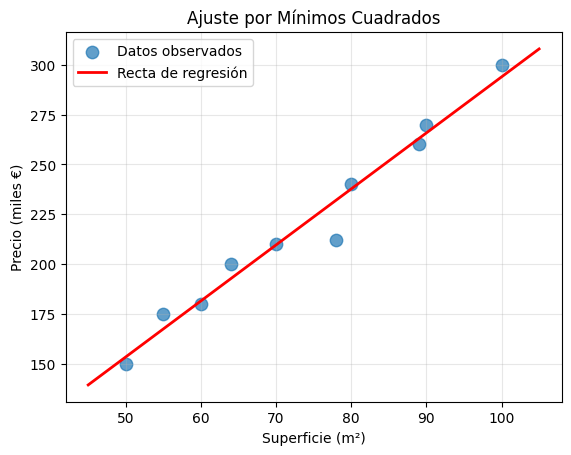

In [11]:
# Predicciones del modelo
precio_predicho = X @ w

# Visualización
plt.scatter(superficie, precio/1000, alpha=0.7, s=80, label='Datos observados')

# Recta de regresión
superficie_range = np.linspace(45, 105, 100)
precio_range = w[0] + w[1] * superficie_range
plt.plot(superficie_range, precio_range/1000, 'r-', linewidth=2,
         label='Recta de regresión')

plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Ajuste por Mínimos Cuadrados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Evaluación del modelo

In [6]:
# Calculamos el error cuadrático medio (MSE)
mse = np.mean((precio - precio_predicho) ** 2)

# Calculamos el error típico de predicción
rmse = np.sqrt(mse)


# Coeficiente de determinación R²
ss_res = np.sum((precio - precio_predicho) ** 2)
ss_tot = np.sum((precio - precio.mean()) ** 2)
r2 = 1 - (ss_res / ss_tot)

print("Métricas de evaluación:")
print(f"RMSE: {rmse:,.0f} €")
print(f"R²: {r2:.3f}")

Métricas de evaluación:
RMSE: 7,720 €
R²: 0.970


El valor del coeficiente de determinación R² indica que el modelo explica el 97% de la variabilidad en los precios, revelando un ajuste nuy satisfactorio para el conjunto de datos.

# **4. Introducción al Descenso del Gradiente**

## Limitaciones del enfoque analítico

El método de mínimos cuadrados proporciona una solución exacta mediante cálculo matricial, pero encuentra limitaciones significativas en escenarios prácticos:

- **Complejidad computacional**: La inversión de matriz tiene complejidad O(n³), volviéndose prohibitiva para datasets con miles de características
- **Requisitos de memoria**: La matriz XᵀX debe caber completamente en memoria
- **Matrices singulares**: Cuando las características son linealmente dependientes, la matriz XᵀX no es invertible

## Concepto fundamental del descenso del gradiente

El descenso del gradiente es un algoritmo de optimización iterativo que encuentra mínimos de funciones mediante pasos sucesivos en la dirección de máximo descenso.

Para la regresión lineal, minimizamos la función de coste:

$$J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)})^2$$

Donde $h_{\mathbf{w}}(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$ es nuestra hipótesis.

## El gradiente de la función de coste

La clave del algoritmo está en calcular el gradiente:

$$\nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{m} \mathbf{X}^T (\mathbf{X}\mathbf{w} - \mathbf{y})$$

El algoritmo actualiza los parámetros iterativamente:

$$\mathbf{w} := \mathbf{w} - \alpha \nabla_{\mathbf{w}} J(\mathbf{w})$$

Donde $\alpha$ es la tasa de aprendizaje.

## Implementación del algoritmo

In [13]:
def descenso_gradiente(X, y, alpha=0.0001, iteraciones=1000, tolerancia=1e-6):
    """
    Implementa el algoritmo de descenso del gradiente para regresión lineal

    Parámetros:
    X: matriz de características (con columna de unos)
    y: vector objetivo
    alpha: tasa de aprendizaje
    iteraciones: número máximo de iteraciones
    tolerancia: criterio de parada por convergencia
    """
    m, n = X.shape
    w = np.zeros(n)  # Inicialización de parámetros
    cost_history = []

    for i in range(iteraciones):
        # Cálculo de predicciones y error
        predicciones = X @ w
        error = predicciones - y

        # Cálculo del gradiente
        gradiente = (1/m) * X.T @ error

        # Actualización de parámetros
        w_nuevo = w - alpha * gradiente

        # Cálculo del coste
        coste = (1/(2*m)) * np.sum(error**2)
        cost_history.append(coste)

        # Verificación de convergencia
        if np.linalg.norm(w_nuevo - w) < tolerancia:
            print(f"Convergencia alcanzada en iteración {i}")
            break

        w = w_nuevo

    return w, cost_history

## Aplicación al problema de viviendas

In [14]:
# Normalización de características para mejor convergencia
X_normalizado = X.copy()
X_normalizado[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Ejecución del algoritmo
w_grad, cost_history = descenso_gradiente(X_normalizado, y, alpha=0.1, iteraciones=1000)

print("Coeficientes obtenidos por descenso del gradiente:")
print(f"w_0: {w_grad[0]:.2f}")
print(f"w_1: {w_grad[1]:.2f}")

Convergencia alcanzada en iteración 227
Coeficientes obtenidos por descenso del gradiente:
w_0: 219700.00
w_1: 44036.50


## Visualización de la convergencia

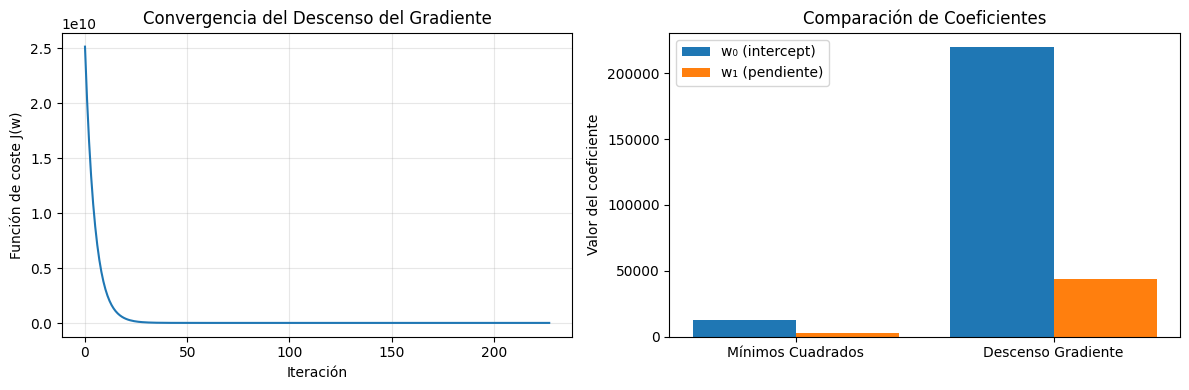

In [15]:
plt.figure(figsize=(12, 4))

# Evolución del coste
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.xlabel('Iteración')
plt.ylabel('Función de coste J(w)')
plt.title('Convergencia del Descenso del Gradiente')
plt.grid(True, alpha=0.3)

# Comparación de resultados
plt.subplot(1, 2, 2)
coeficientes = ['Mínimos Cuadrados', 'Descenso Gradiente']
w0_valores = [w[0], w_grad[0]]
w1_valores = [w[1], w_grad[1]]

x_pos = np.arange(len(coeficientes))
plt.bar(x_pos - 0.2, w0_valores, 0.4, label='w₀ (intercept)')
plt.bar(x_pos + 0.2, w1_valores, 0.4, label='w₁ (pendiente)')
plt.xticks(x_pos, coeficientes)
plt.ylabel('Valor del coeficiente')
plt.title('Comparación de Coeficientes')
plt.legend()

plt.tight_layout()
plt.show()

## Análisis de resultados

In [17]:
# Predicciones con ambos métodos
pred_mc = X @ w
pred_dg = X_normalizado @ w_grad

# Cálculo de R² para ambos métodos
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)
    return 1 - (ss_res / ss_tot)

r2_mc = r2_score(y, pred_mc)
r2_dg = r2_score(y, pred_dg)

print("Comparación de métodos:")
print(f"Mínimos Cuadrados  - R²: {r2_mc:.6f}")
print(f"Descenso Gradiente - R²: {r2_dg:.6f}")
print(f"Diferencia: {abs(r2_mc - r2_dg):.6f}")

Comparación de métodos:
Mínimos Cuadrados  - R²: 0.970184
Descenso Gradiente - R²: 0.970184
Diferencia: 0.000000


## Ventajas del descenso del gradiente

- **Escalabilidad**: Maneja datasets que no caben en memoria mediante mini-batches
- **Flexibilidad**: Aplicable a funciones de coste no lineales
- **Implementación simple**: No requiere operaciones complejas de álgebra lineal
- **Convergencia garantizada**: Para funciones convexas con tasa de aprendizaje apropiada

El descenso del gradiente establece las bases para algoritmos de optimización en machine learning moderno, particularmente en redes neuronales donde las soluciones analíticas no son viables.